In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Rajesh Gonnade\Downloads\50_Startups.csv")
df.head()

,RandDSpend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
df.describe()

,RandDSpend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandDSpend       50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.dtypes

RandDSpend         float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['State'],inplace=True)


In [8]:
df.isnull().sum()

RandDSpend         0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

<AxesSubplot:>

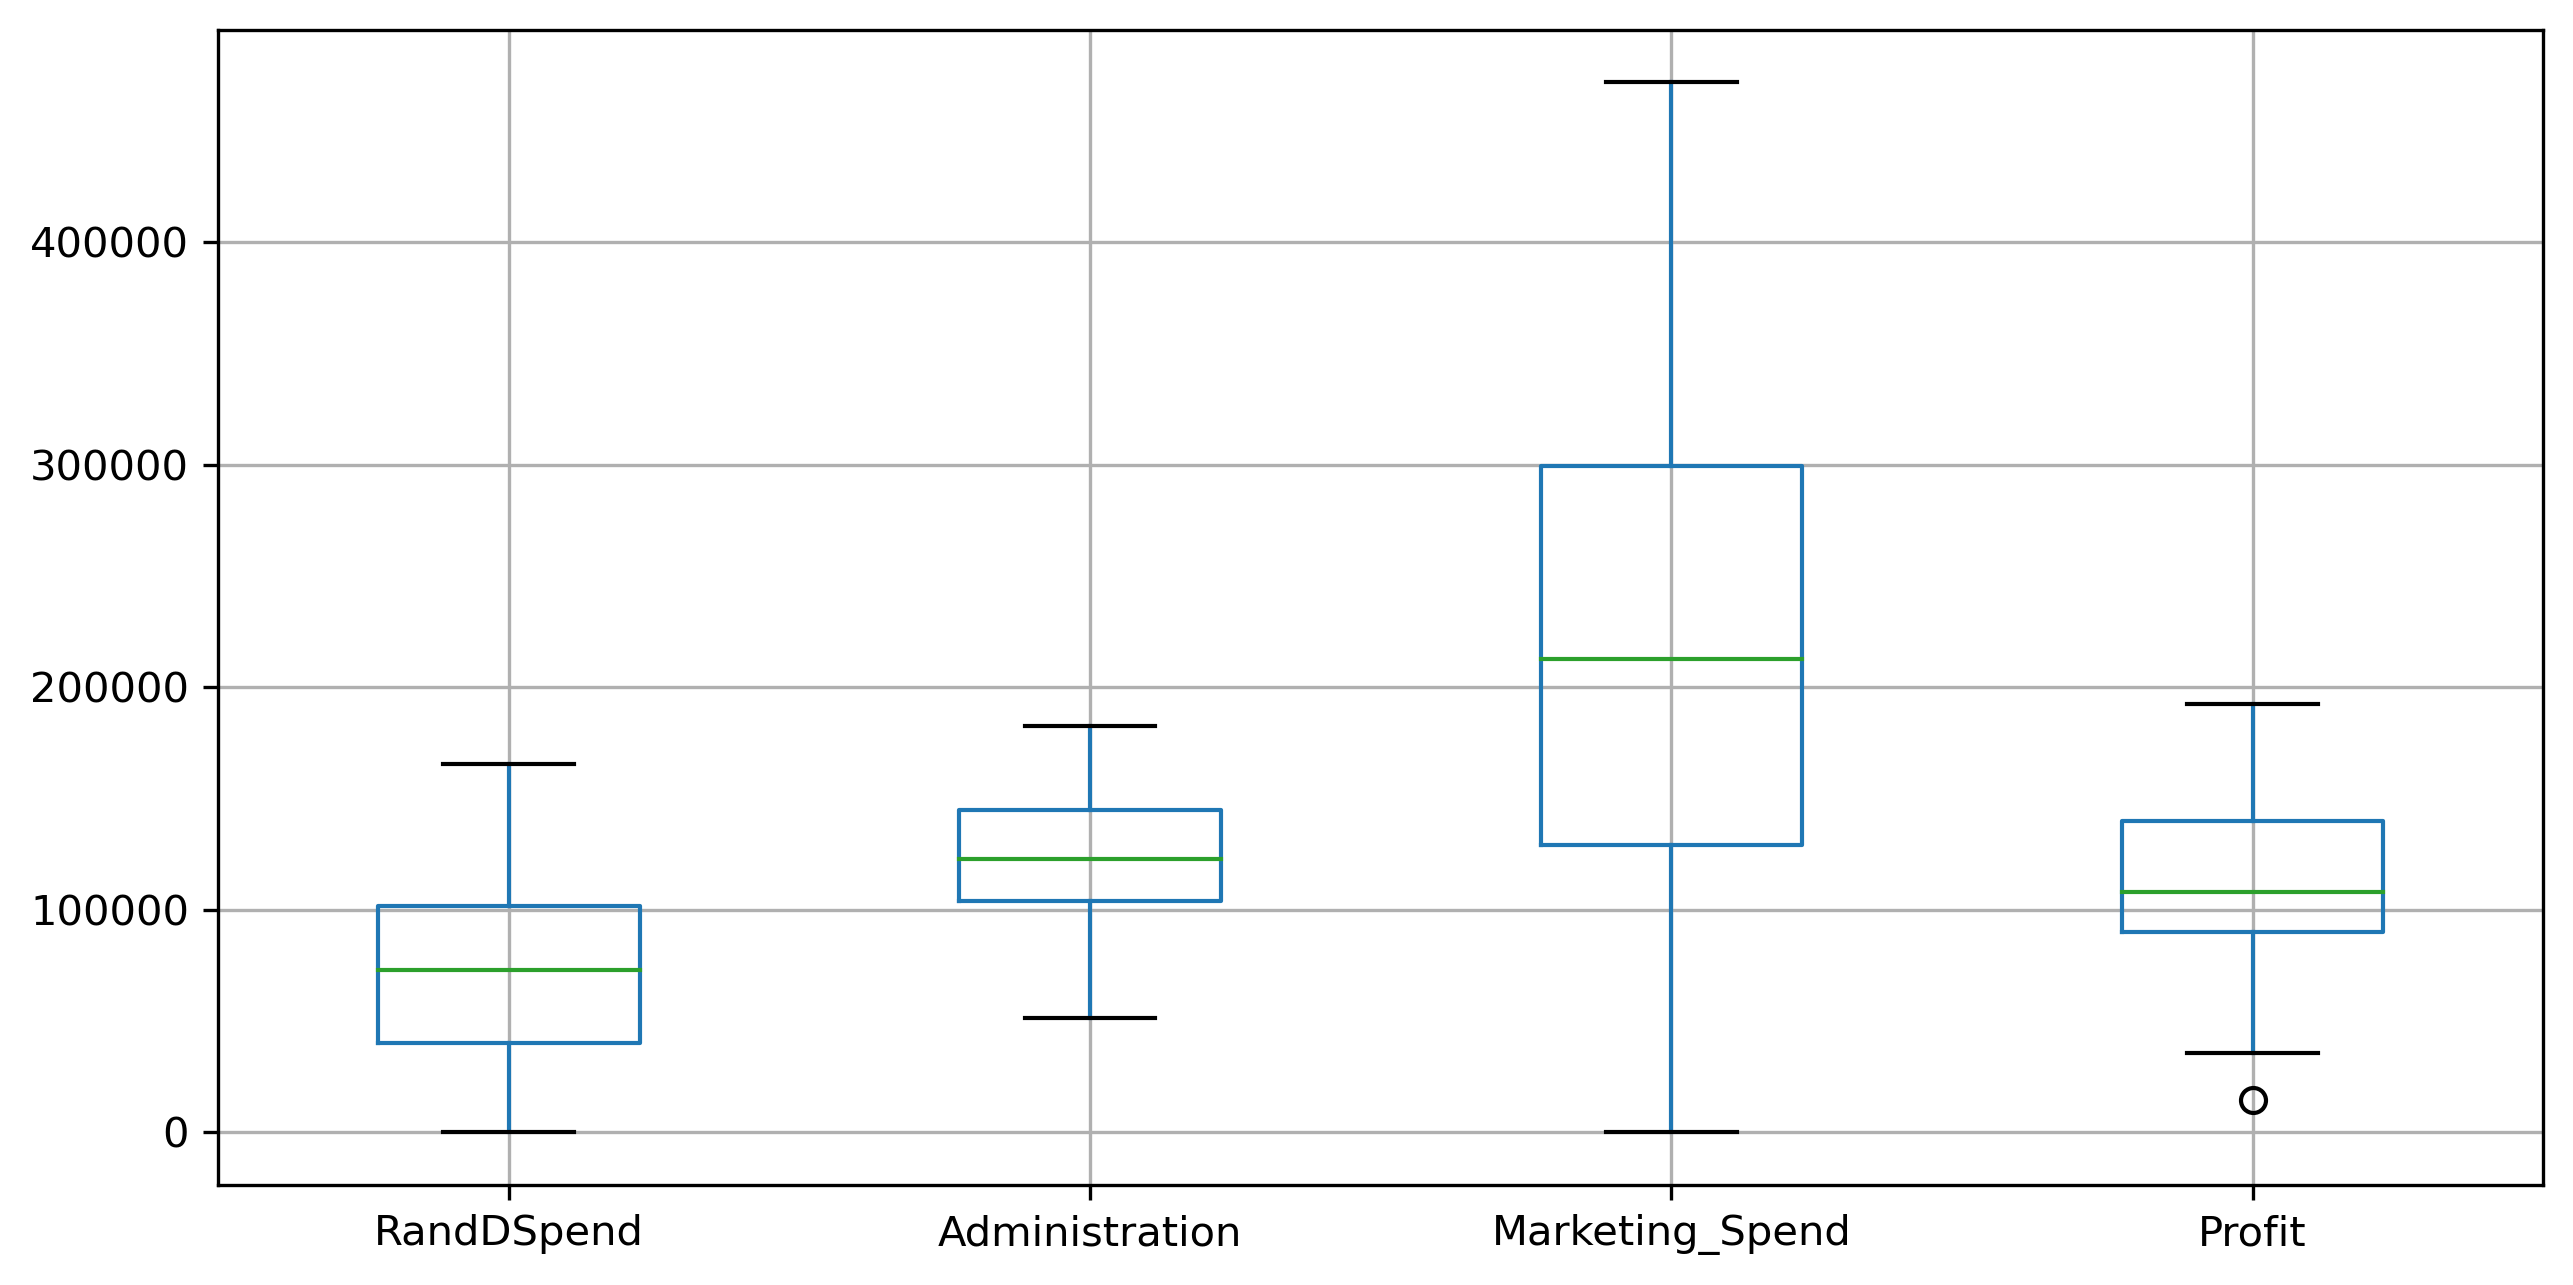

In [9]:
df.boxplot()

In [10]:
df.corr()

,RandDSpend,Administration,Marketing_Spend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


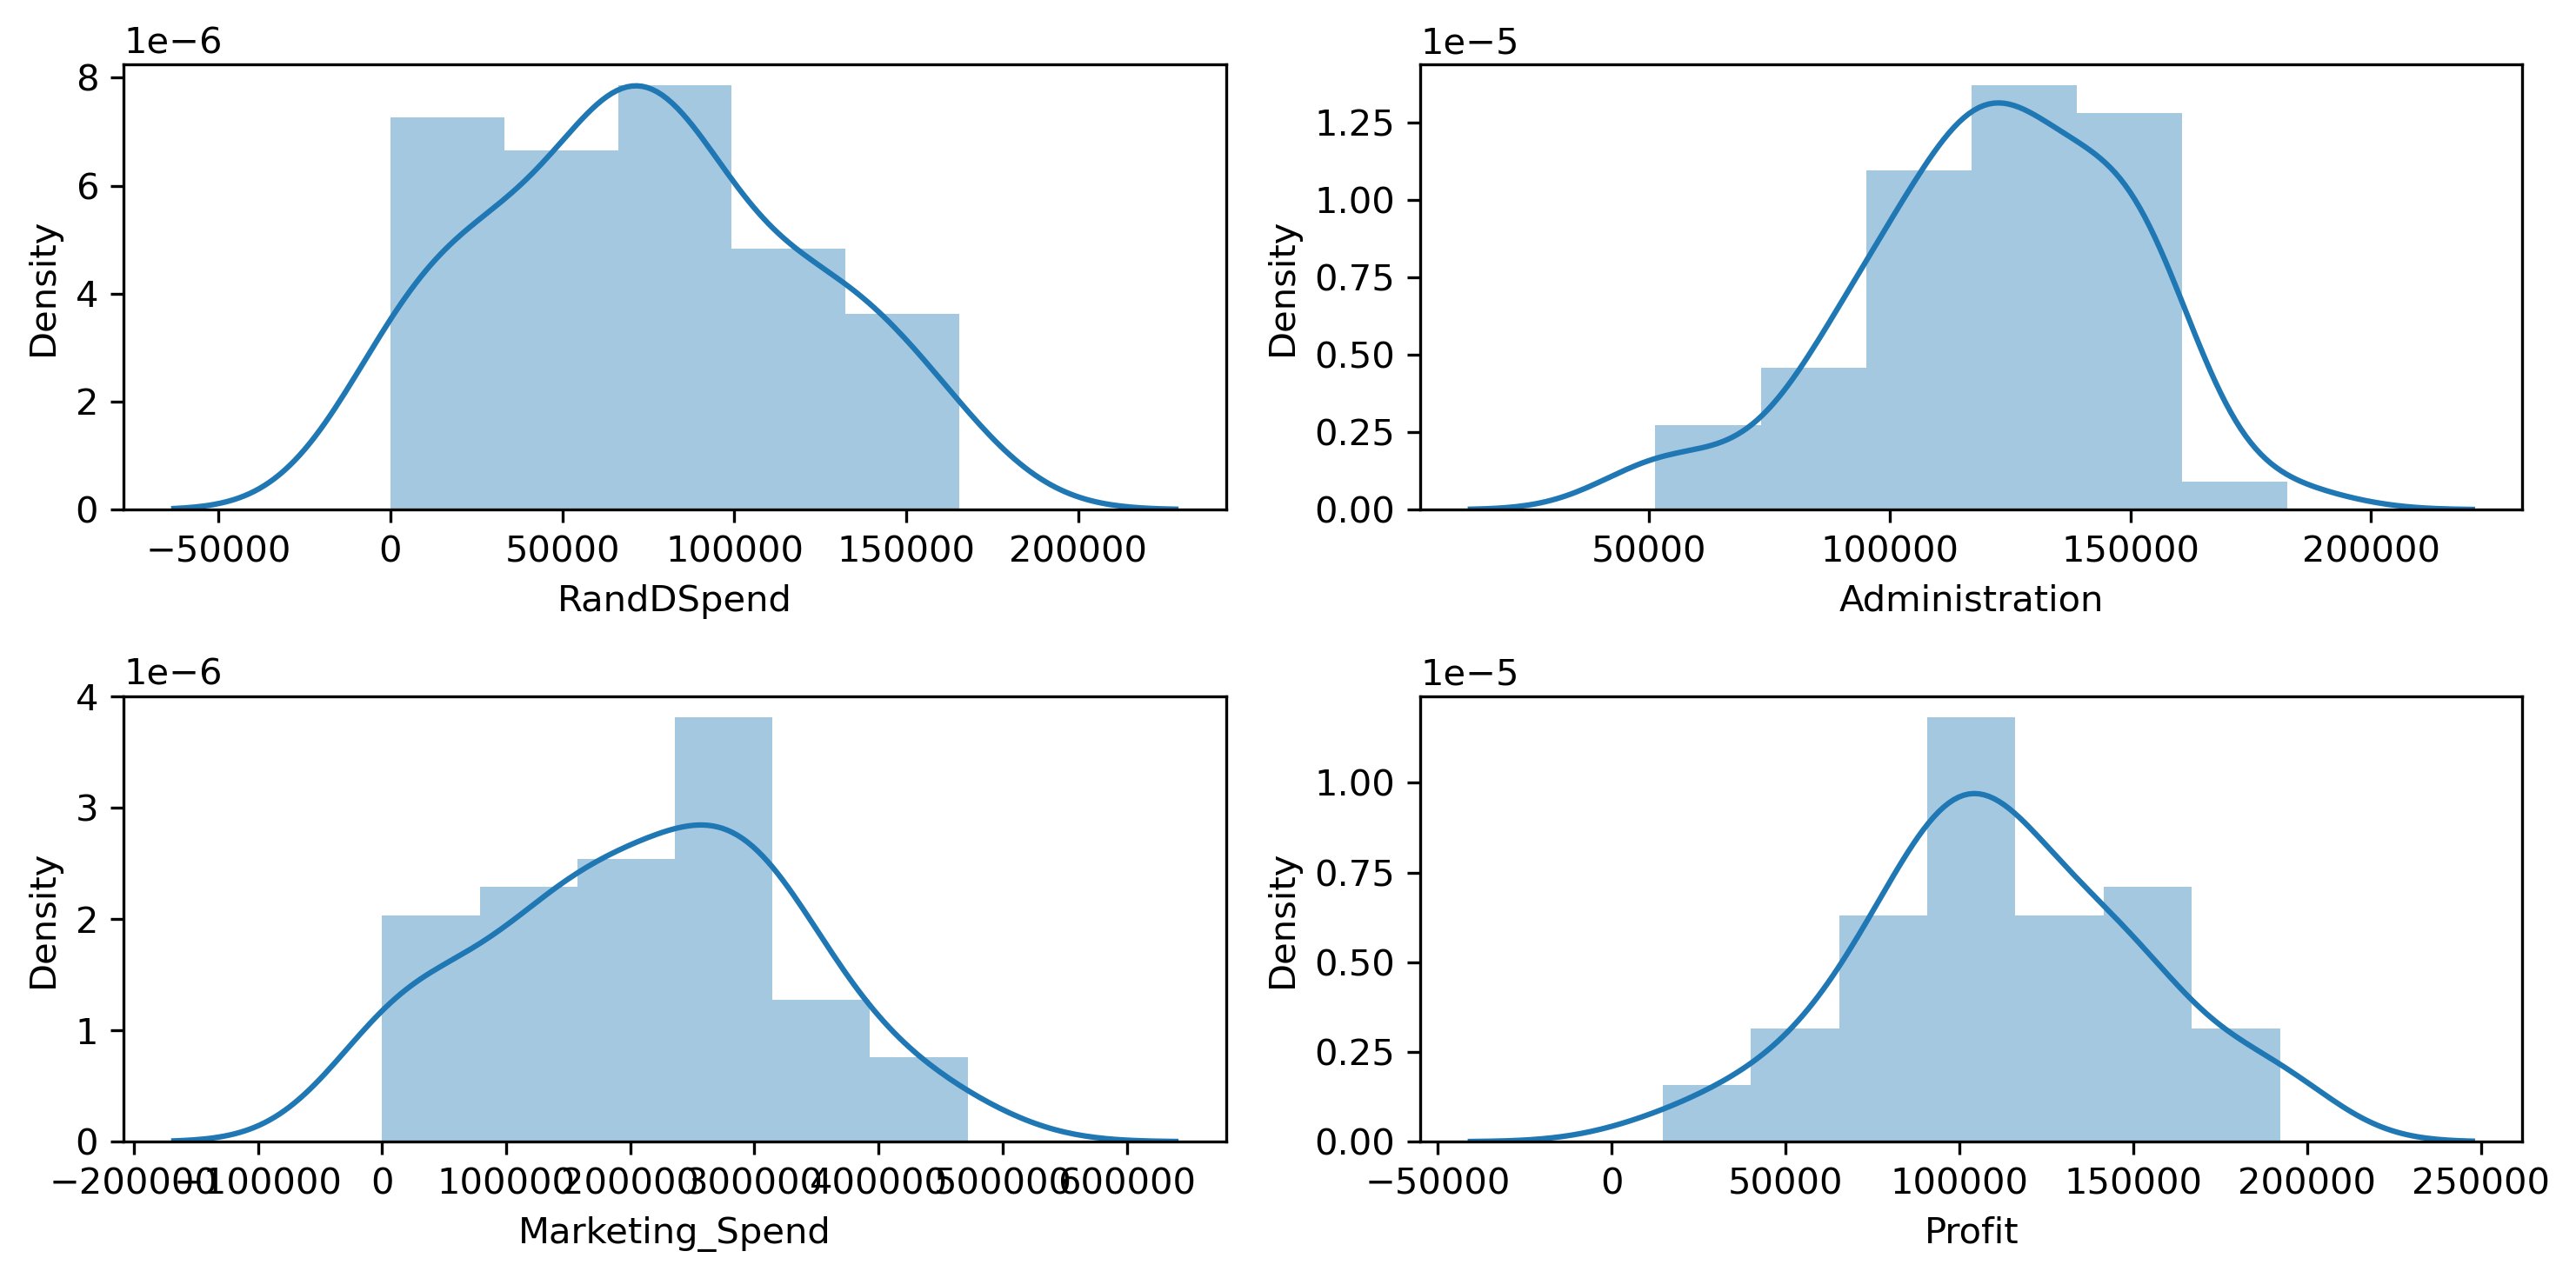

In [11]:
plt.subplot(2,2,1)
sns.distplot(df['RandDSpend'])

plt.subplot(2,2,2)
sns.distplot(df['Administration'])

plt.subplot(2,2,3)
sns.distplot(df['Marketing_Spend'])

plt.subplot(2,2,4)
sns.distplot(df['Profit'])
plt.tight_layout()

In [12]:
df.skew()

RandDSpend         0.164002
Administration    -0.489025
Marketing_Spend   -0.046472
Profit             0.023291
dtype: float64

In [13]:
df.head()

,RandDSpend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# log transformation

In [15]:
df['log_RandDSpend'] = np.log(df['RandDSpend'])
df['log_Administration'] = np.log(df['Administration'])
df['log_Marketing_Spend'] = np.log(df['Marketing_Spend'])
df['log_Profit'] = np.log(df['Profit'])
df

,RandDSpend,Administration,Marketing_Spend,Profit,log_RandDSpend,log_Administration,log_Marketing_Spend,log_Profit
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,12.166613
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,12.164167
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,12.160292
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,12.116706
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,12.020875
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776,11.963945
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571,11.958396
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118,11.956024
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518,11.933028
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007,11.916789


In [16]:
df.skew()

RandDSpend             0.164002
Administration        -0.489025
Marketing_Spend       -0.046472
Profit                 0.023291
log_RandDSpend              NaN
log_Administration    -1.325292
log_Marketing_Spend         NaN
log_Profit            -1.819463
dtype: float64

In [17]:
# negative infinity (-∞) after applying a logarithmic transformation to a value, it indicates that the original value was zero.
# we use square root transformation.

In [18]:
df['sqrt_RandDSpend'] = np.sqrt(df['RandDSpend'])
df['sqrt_Administration'] = np.sqrt(df['Administration'])
df['sqrt_Marketing_Spend'] = np.sqrt(df['Marketing_Spend'])
df['sqrt_Profit'] = np.sqrt(df['Profit'])
df.head()

,RandDSpend,Administration,Marketing_Spend,Profit,log_RandDSpend,log_Administration,log_Marketing_Spend,log_Profit,sqrt_RandDSpend,sqrt_Administration,sqrt_Marketing_Spend,sqrt_Profit
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,12.166613,406.631529,369.997027,686.865416,438.476715
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,12.164167,403.234051,389.072731,666.257105,437.940704
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,12.160292,391.716109,318.033882,638.697534,437.093114
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,12.116706,379.963696,344.487808,619.031195,427.670422
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,12.020875,376.971272,302.310718,605.118517,407.661551


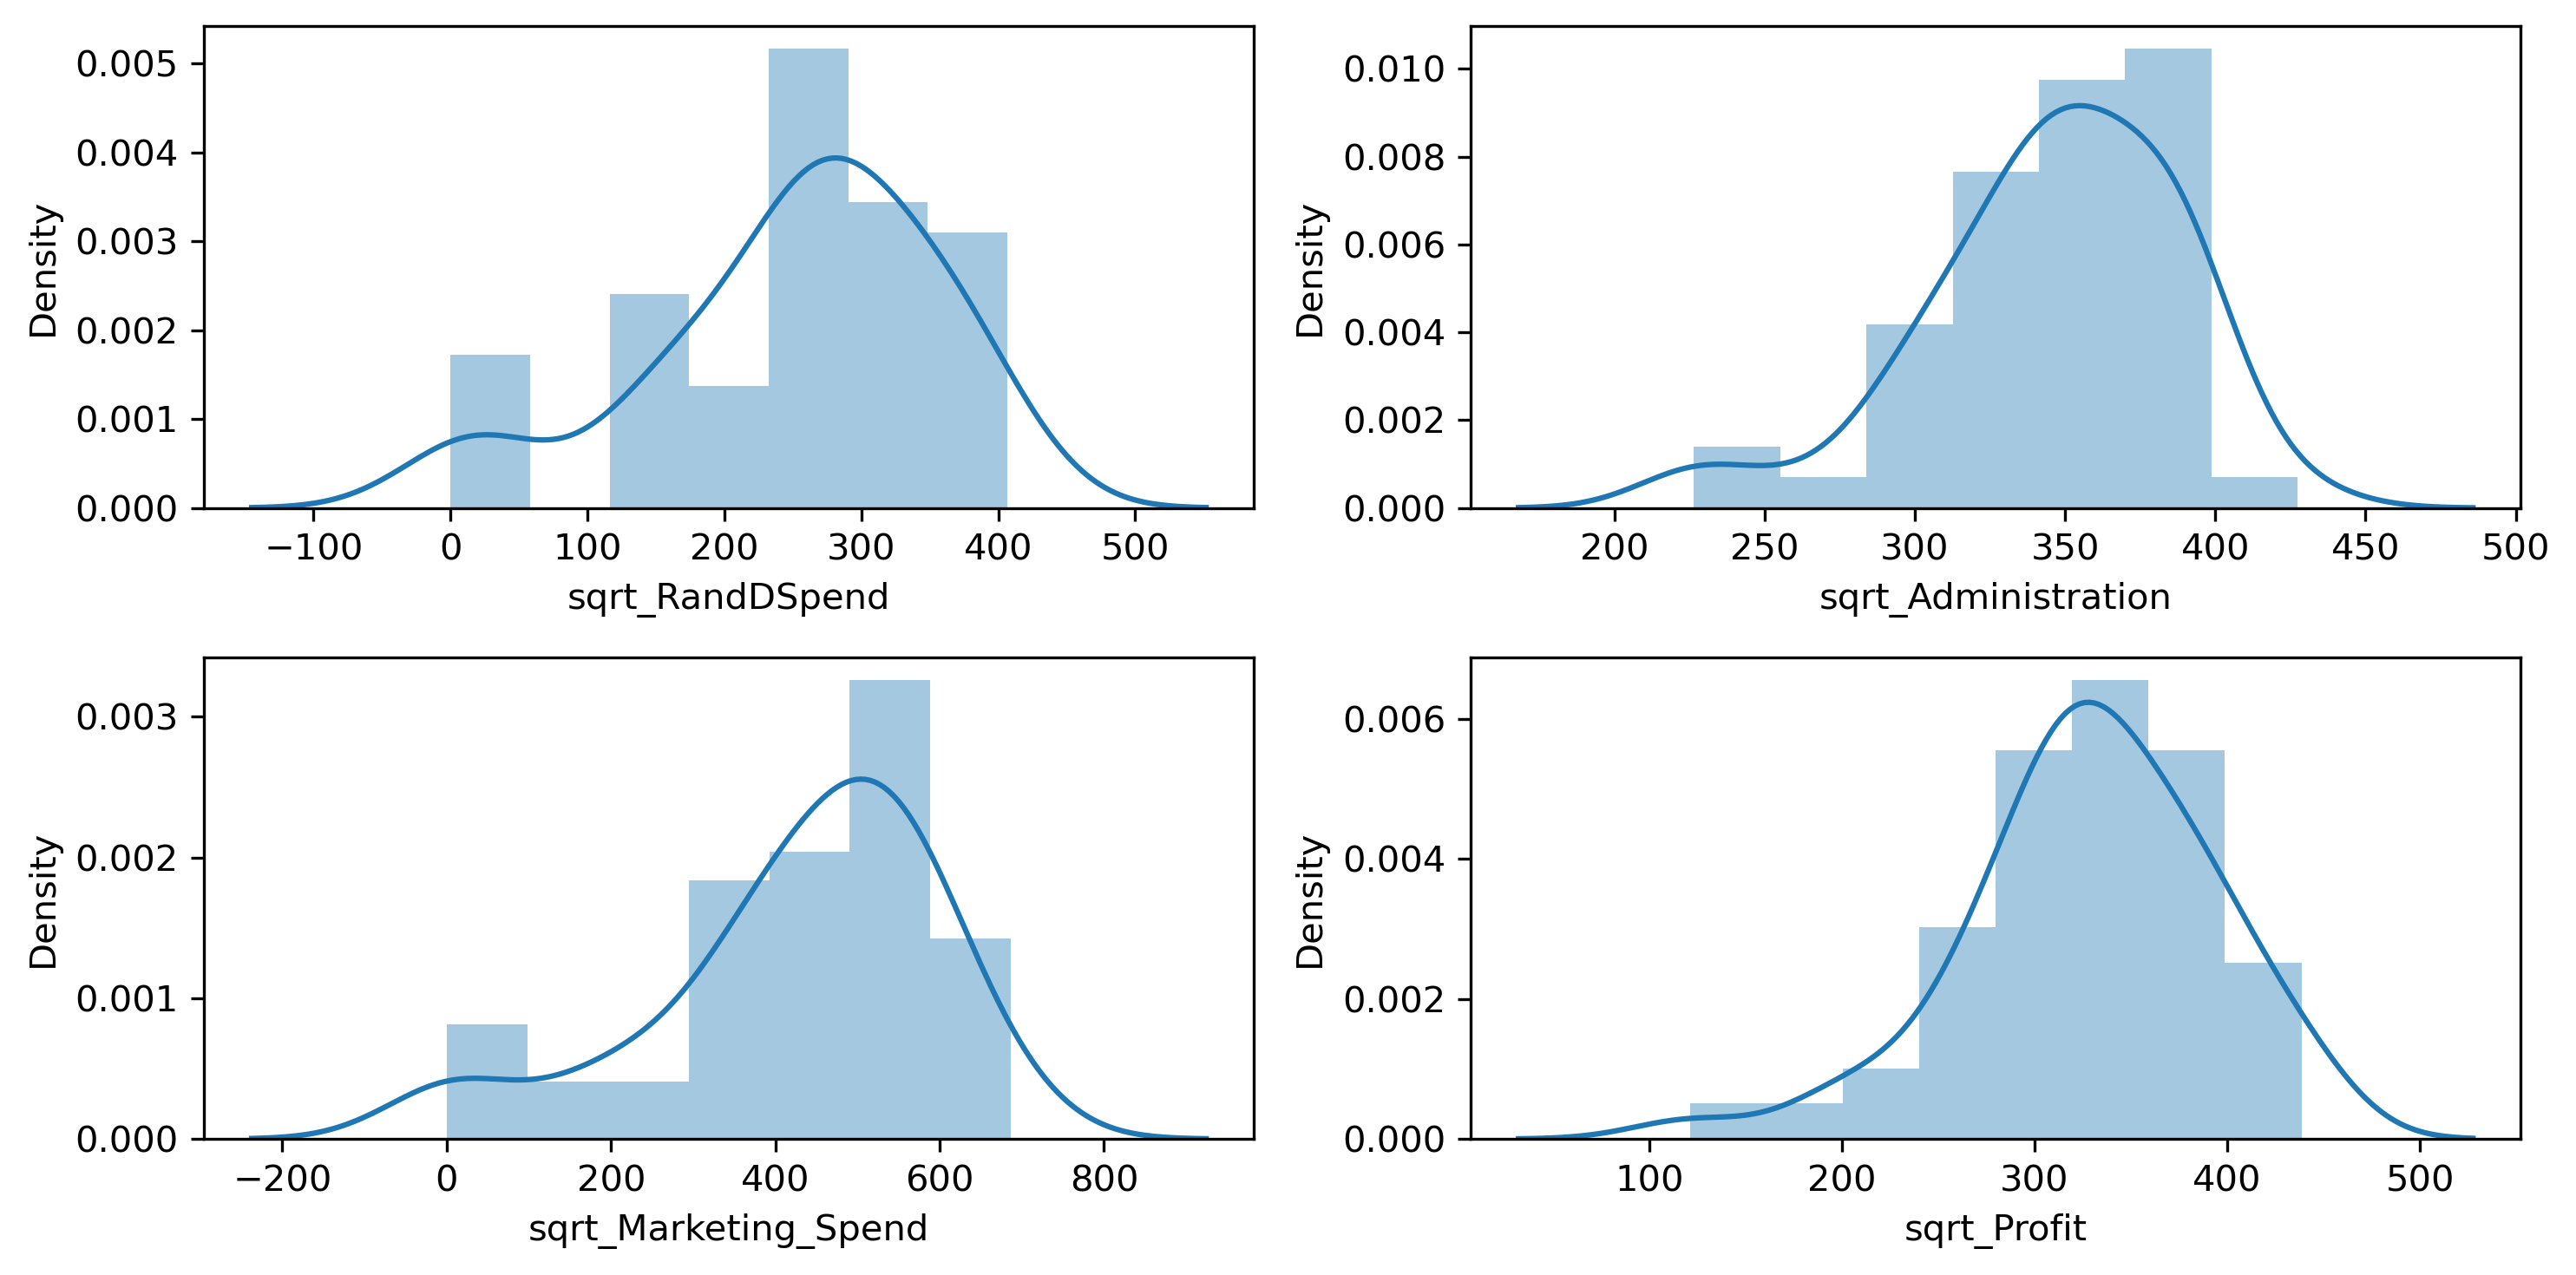

In [19]:
plt.subplot(2,2,1)
sns.distplot(df['sqrt_RandDSpend'])

plt.subplot(2,2,2)
sns.distplot(df['sqrt_Administration'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_Marketing_Spend'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_Profit'])
plt.tight_layout()

In [20]:
df.skew()

RandDSpend              0.164002
Administration         -0.489025
Marketing_Spend        -0.046472
Profit                  0.023291
log_RandDSpend               NaN
log_Administration     -1.325292
log_Marketing_Spend          NaN
log_Profit             -1.819463
sqrt_RandDSpend        -0.843345
sqrt_Administration    -0.883549
sqrt_Marketing_Spend   -1.058973
sqrt_Profit            -0.706066
dtype: float64

In [ ]:
'''
RandDSpend: 0.164 indicates a slight right skewness,the distribution of RandDSpend data is slightly skewed towards higher values.
Administration:  -0.489  a moderate left skewness, indicating that the distribution of Administration data is skewed towards lower values.
Marketing_Spend: indicates a nearly symmetric distribution, with a very slight left skewness.
Profit: very slight right skewness, indicating a nearly symmetric distribution, slightly skewed towards higher values.
log_Administration and log_Profit:  indicate moderate left skewness, suggesting that the distributions of these variables after applying the logarithmic transformation are skewed towards lower values.
sqrt_RandDSpend, sqrt_Administration, sqrt_Marketing_Spend, sqrt_Profit: The skewness values for variables after applying the square root transformation are all negative but close to zero, suggesting nearly symmetric distributions with very slight left skewness.
'''

# Model Building

In [22]:
import statsmodels.formula.api as smf
model = smf.ols('sqrt_Profit~sqrt_RandDSpend+sqrt_Administration+sqrt_Marketing_Spend',data=df).fit()
model.rsquared

0.9305435277653866

In [23]:
#On original data
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RandDSpend+Administration+Marketing_Spend',data=df).fit()
model1.rsquared

0.9507459940683246

In [24]:
data=pd.DataFrame({'Data' : ['Applying_Sqrt_transformation','Original data'],
                   'R^2 Accuracy':[model.rsquared,model1.rsquared]})
data

,Data,R^2 Accuracy
0,Applying_Sqrt_transformation,0.930544
1,Original data,0.950746


In [25]:
import statsmodels.api as sm

In [26]:
model.resid

0     16.712702
1     19.029019
2     23.068885
3     21.535436
4      2.170786
5     -0.829213
6      1.622600
7      1.364848
8      5.097902
9     -1.990467
10    12.915258
11    10.378957
12    14.793649
13     7.070674
14   -19.323705
15   -19.928346
16    10.044533
17    -7.889531
18    -8.187169
19     4.574328
20    -1.112330
21   -12.235191
22   -10.405909
23    -6.625354
24   -14.797708
25    -1.260340
26   -15.201956
27   -16.960977
28    -7.118440
29   -11.043178
30    -9.784473
31   -11.067043
32   -13.519568
33   -10.055366
34     3.839286
35     0.875333
36    19.604679
37    -9.029606
38    16.287589
39   -14.230159
40    -1.897896
41    -2.688529
42    -5.671341
43    12.287531
44    -9.160998
45    58.637692
46    15.791215
47    29.524359
48    -5.648360
49   -59.564107
dtype: float64

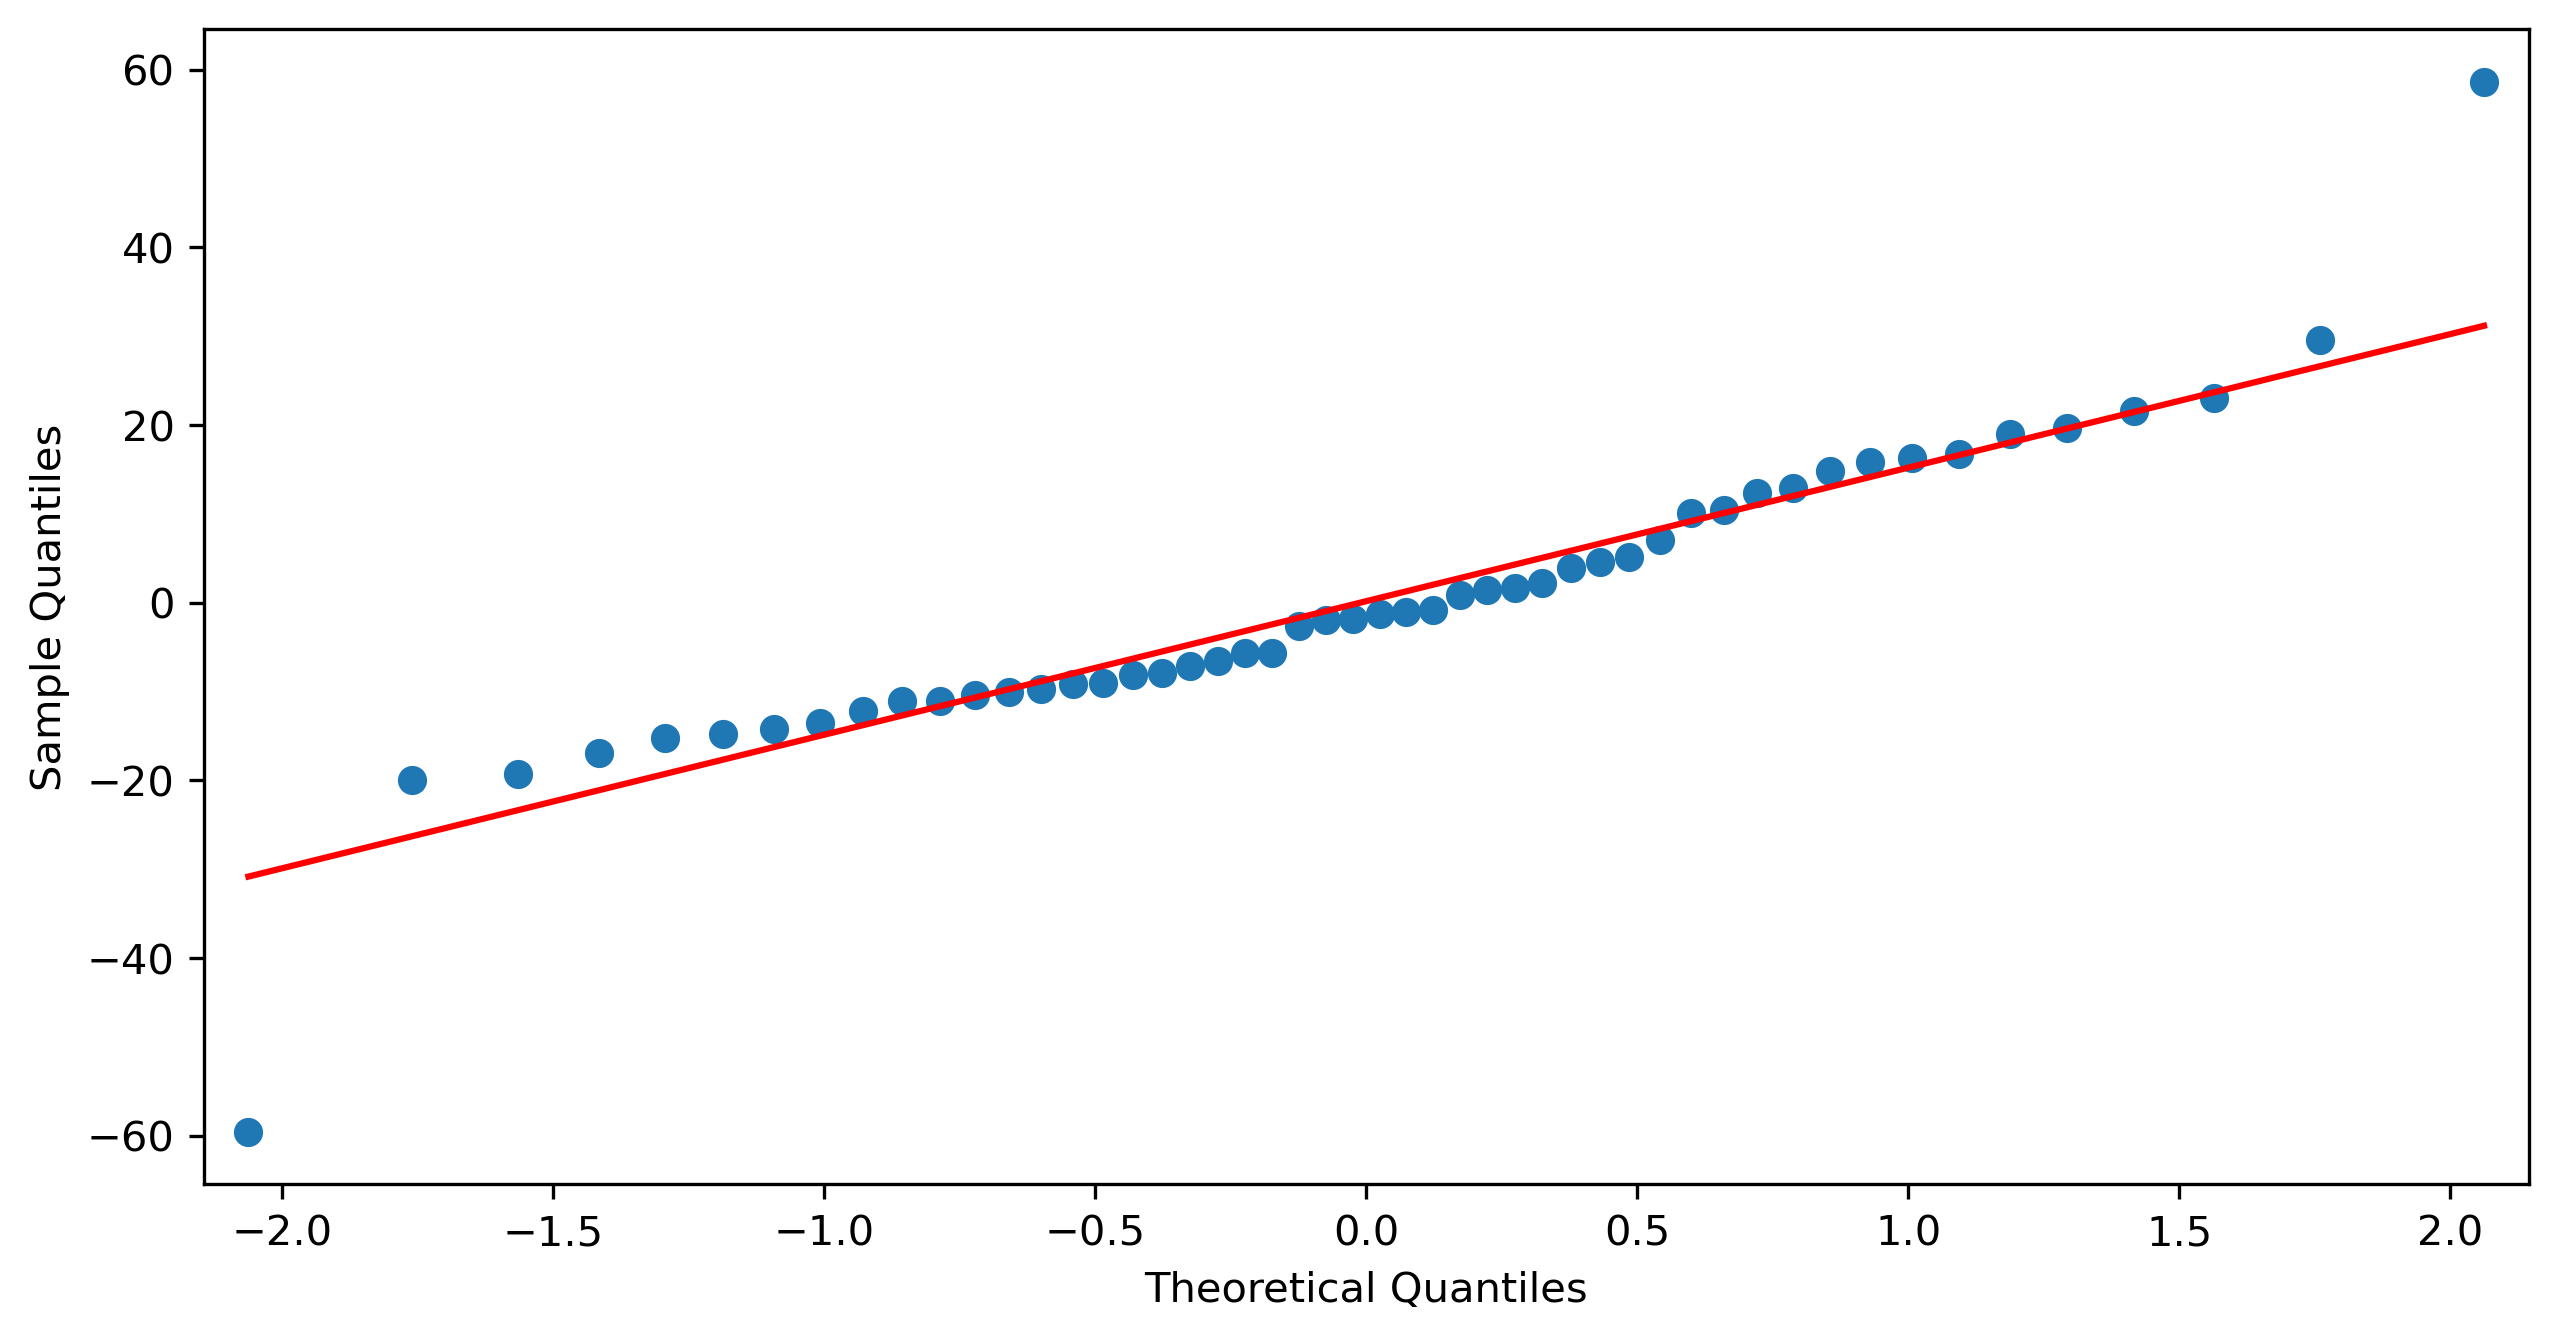

In [27]:
sm.qqplot(model.resid, line = 'q');

In [28]:
np.argmax(model.resid), np.max(model.resid)

(45, 58.63769199528568)

In [29]:
model.params

Intercept               188.038398
sqrt_RandDSpend           0.577516
sqrt_Administration      -0.030605
sqrt_Marketing_Spend      0.014869
dtype: float64

In [30]:
model.fittedvalues

0     421.764013
1     418.911684
2     414.024229
3     406.134986
4     405.490765
5     397.050263
6     393.500811
7     393.290191
8     385.045366
9     388.978787
10    369.343751
11    369.435998
12    361.484864
13    359.408998
14    383.470173
15    380.368411
16    346.316141
17    361.966317
18    360.702275
19    345.820963
20    345.312896
21    345.871250
22    342.599001
23    336.373728
24    344.270074
25    328.986354
26    340.368898
27    341.010834
28    328.494201
29    328.855449
30    325.913545
31    323.290616
32    325.653898
33    321.148471
34    307.147531
35    309.736177
36    281.573325
37    308.944827
38    268.719533
39    298.845268
40    281.611875
41    281.612945
42    273.063356
43    251.831723
44    264.504551
45    196.168273
46    206.673951
47    176.775738
48    194.522419
49    180.730935
dtype: float64

Text(0, 0.5, 'Errors')

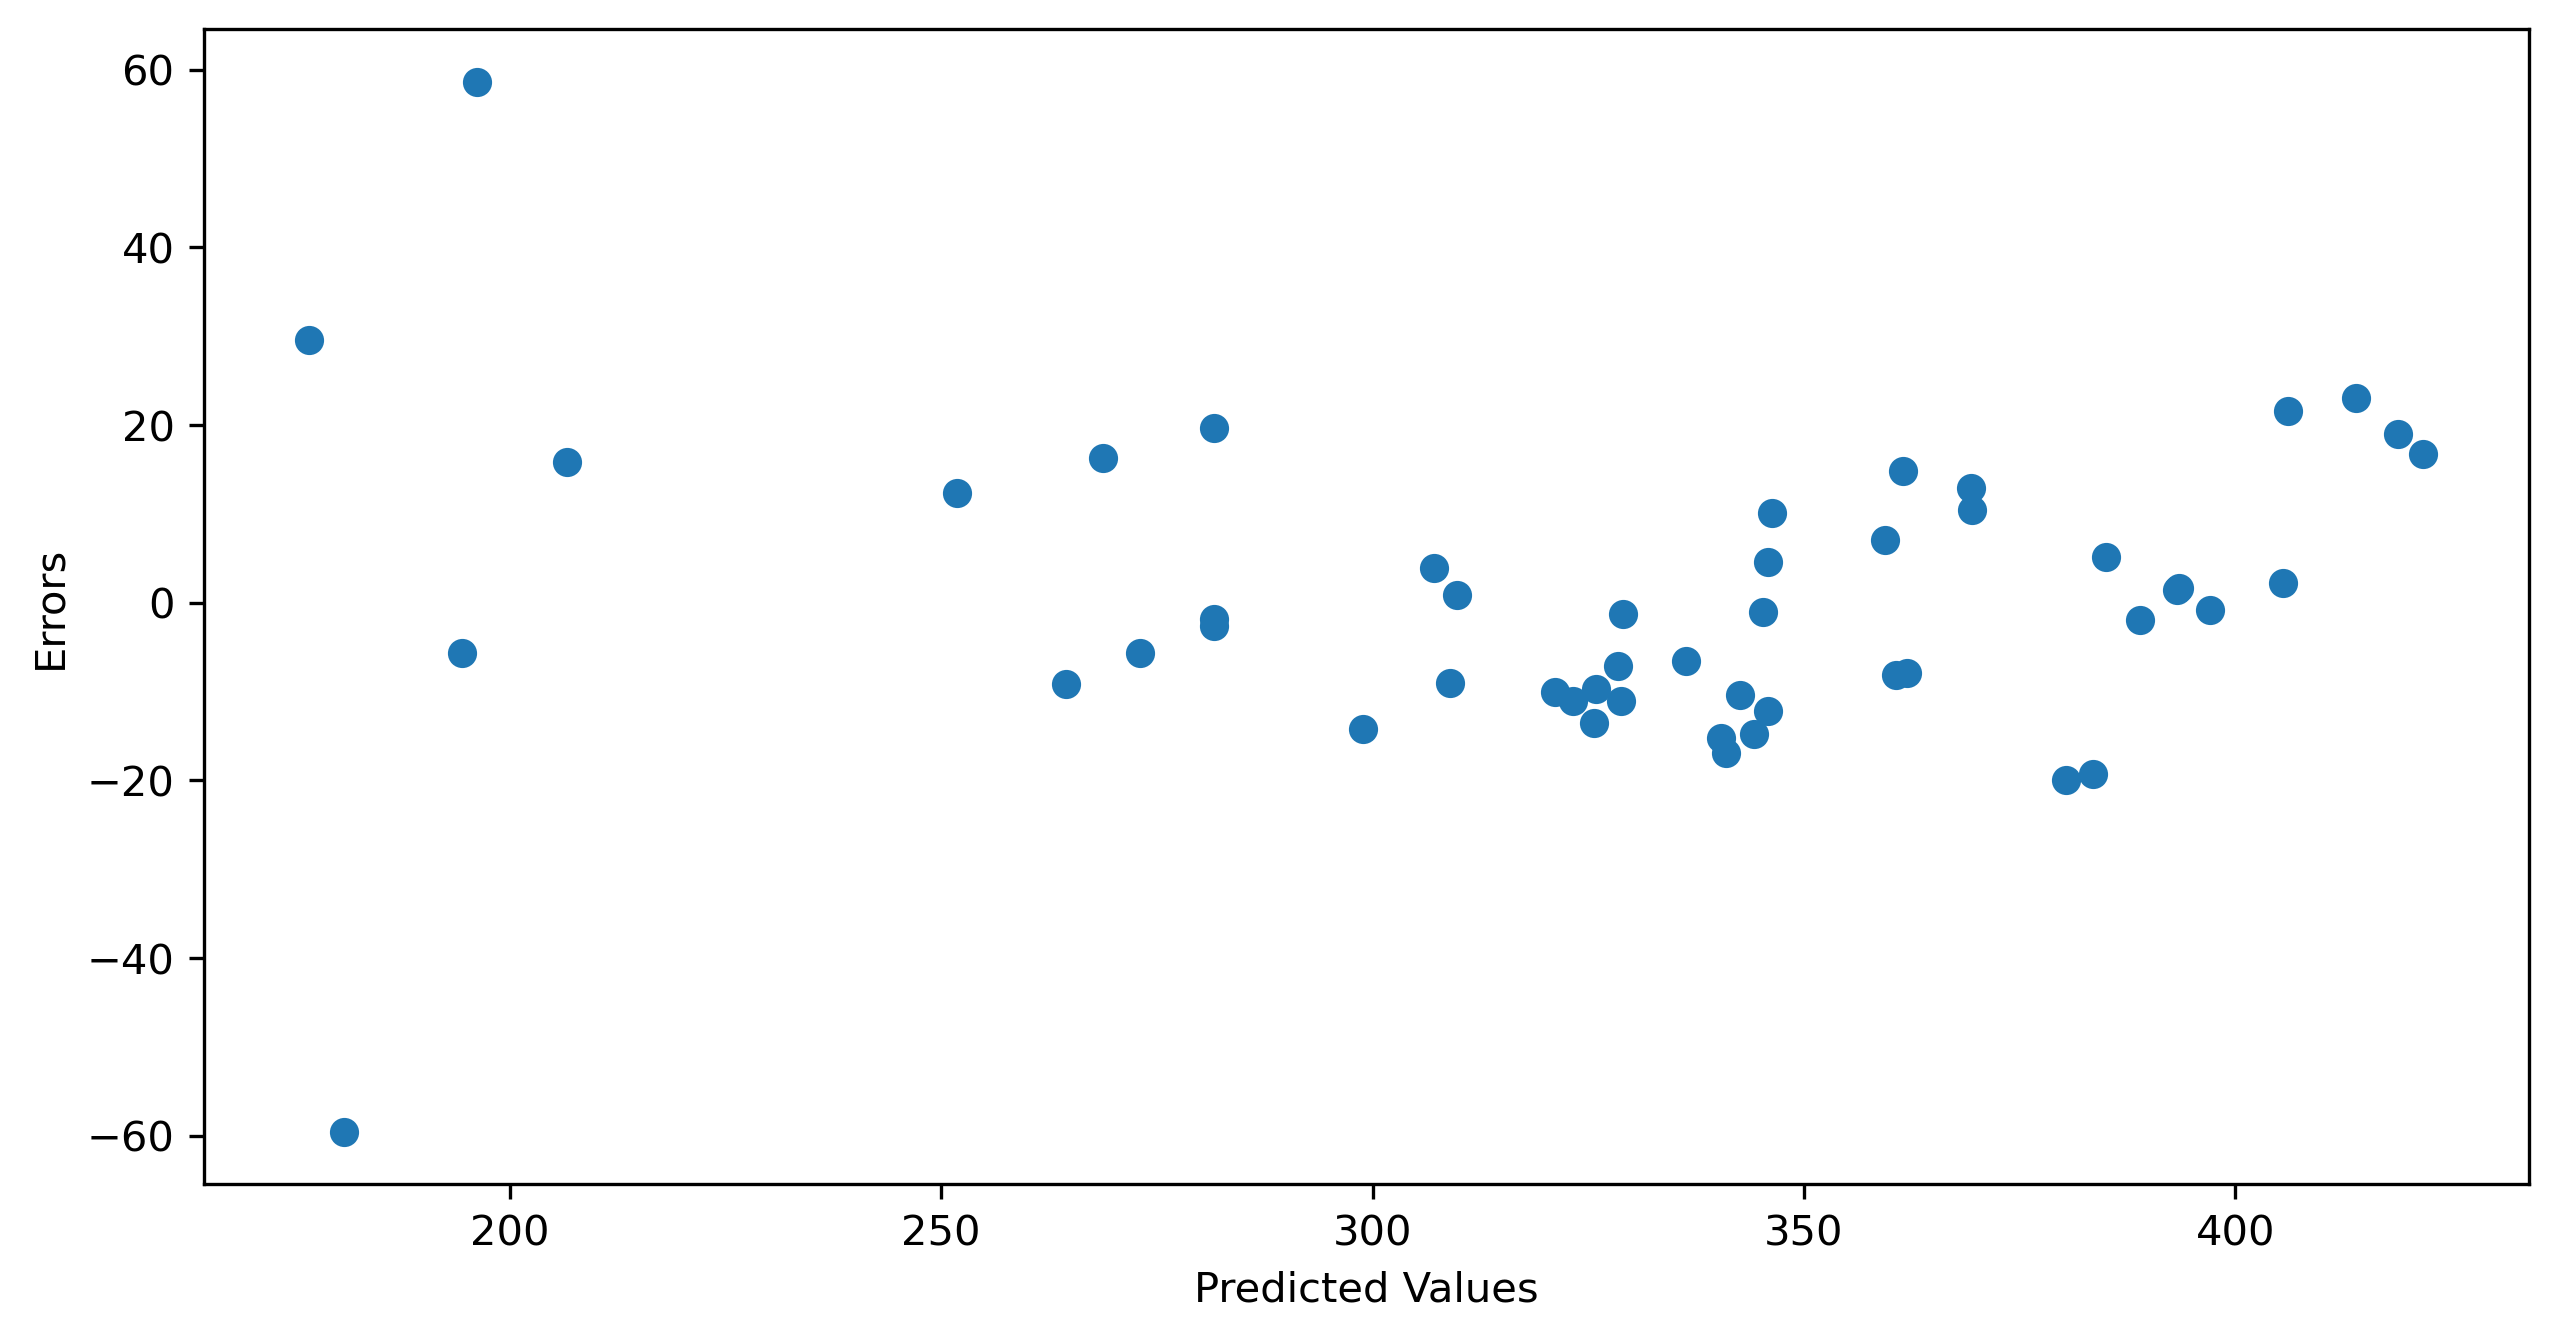

In [31]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

In [32]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [33]:
c

array([2.01903430e-02, 2.86357507e-02, 3.97065070e-02, 2.28976847e-02,
       4.02732177e-04, 4.07138578e-05, 2.53199263e-04, 8.51716852e-05,
       1.17703183e-03, 1.65734387e-04, 5.21671889e-03, 5.96890644e-03,
       4.87665517e-03, 1.27021418e-03, 1.87916221e-02, 1.19201554e-02,
       2.20237868e-03, 2.29251320e-03, 1.72988205e-03, 1.14239912e-02,
       3.40954529e-05, 9.05223949e-03, 3.32386979e-03, 1.49213857e-03,
       1.01417465e-02, 4.20328639e-05, 7.65472954e-03, 1.44859115e-02,
       5.02157559e-03, 5.52754476e-03, 3.61966403e-03, 6.14672255e-03,
       1.37468753e-02, 2.45957018e-03, 1.09321006e-03, 3.71004188e-05,
       2.10149675e-02, 1.81713851e-02, 3.28219854e-02, 1.06652687e-02,
       1.36036256e-04, 3.93716367e-04, 1.36462344e-03, 8.87618924e-03,
       7.59078603e-03, 4.99713666e-01, 1.25974337e-01, 1.84497552e-01,
       1.64887206e-02, 5.99202625e-01])

Text(0, 0.5, 'Cooks Distance')

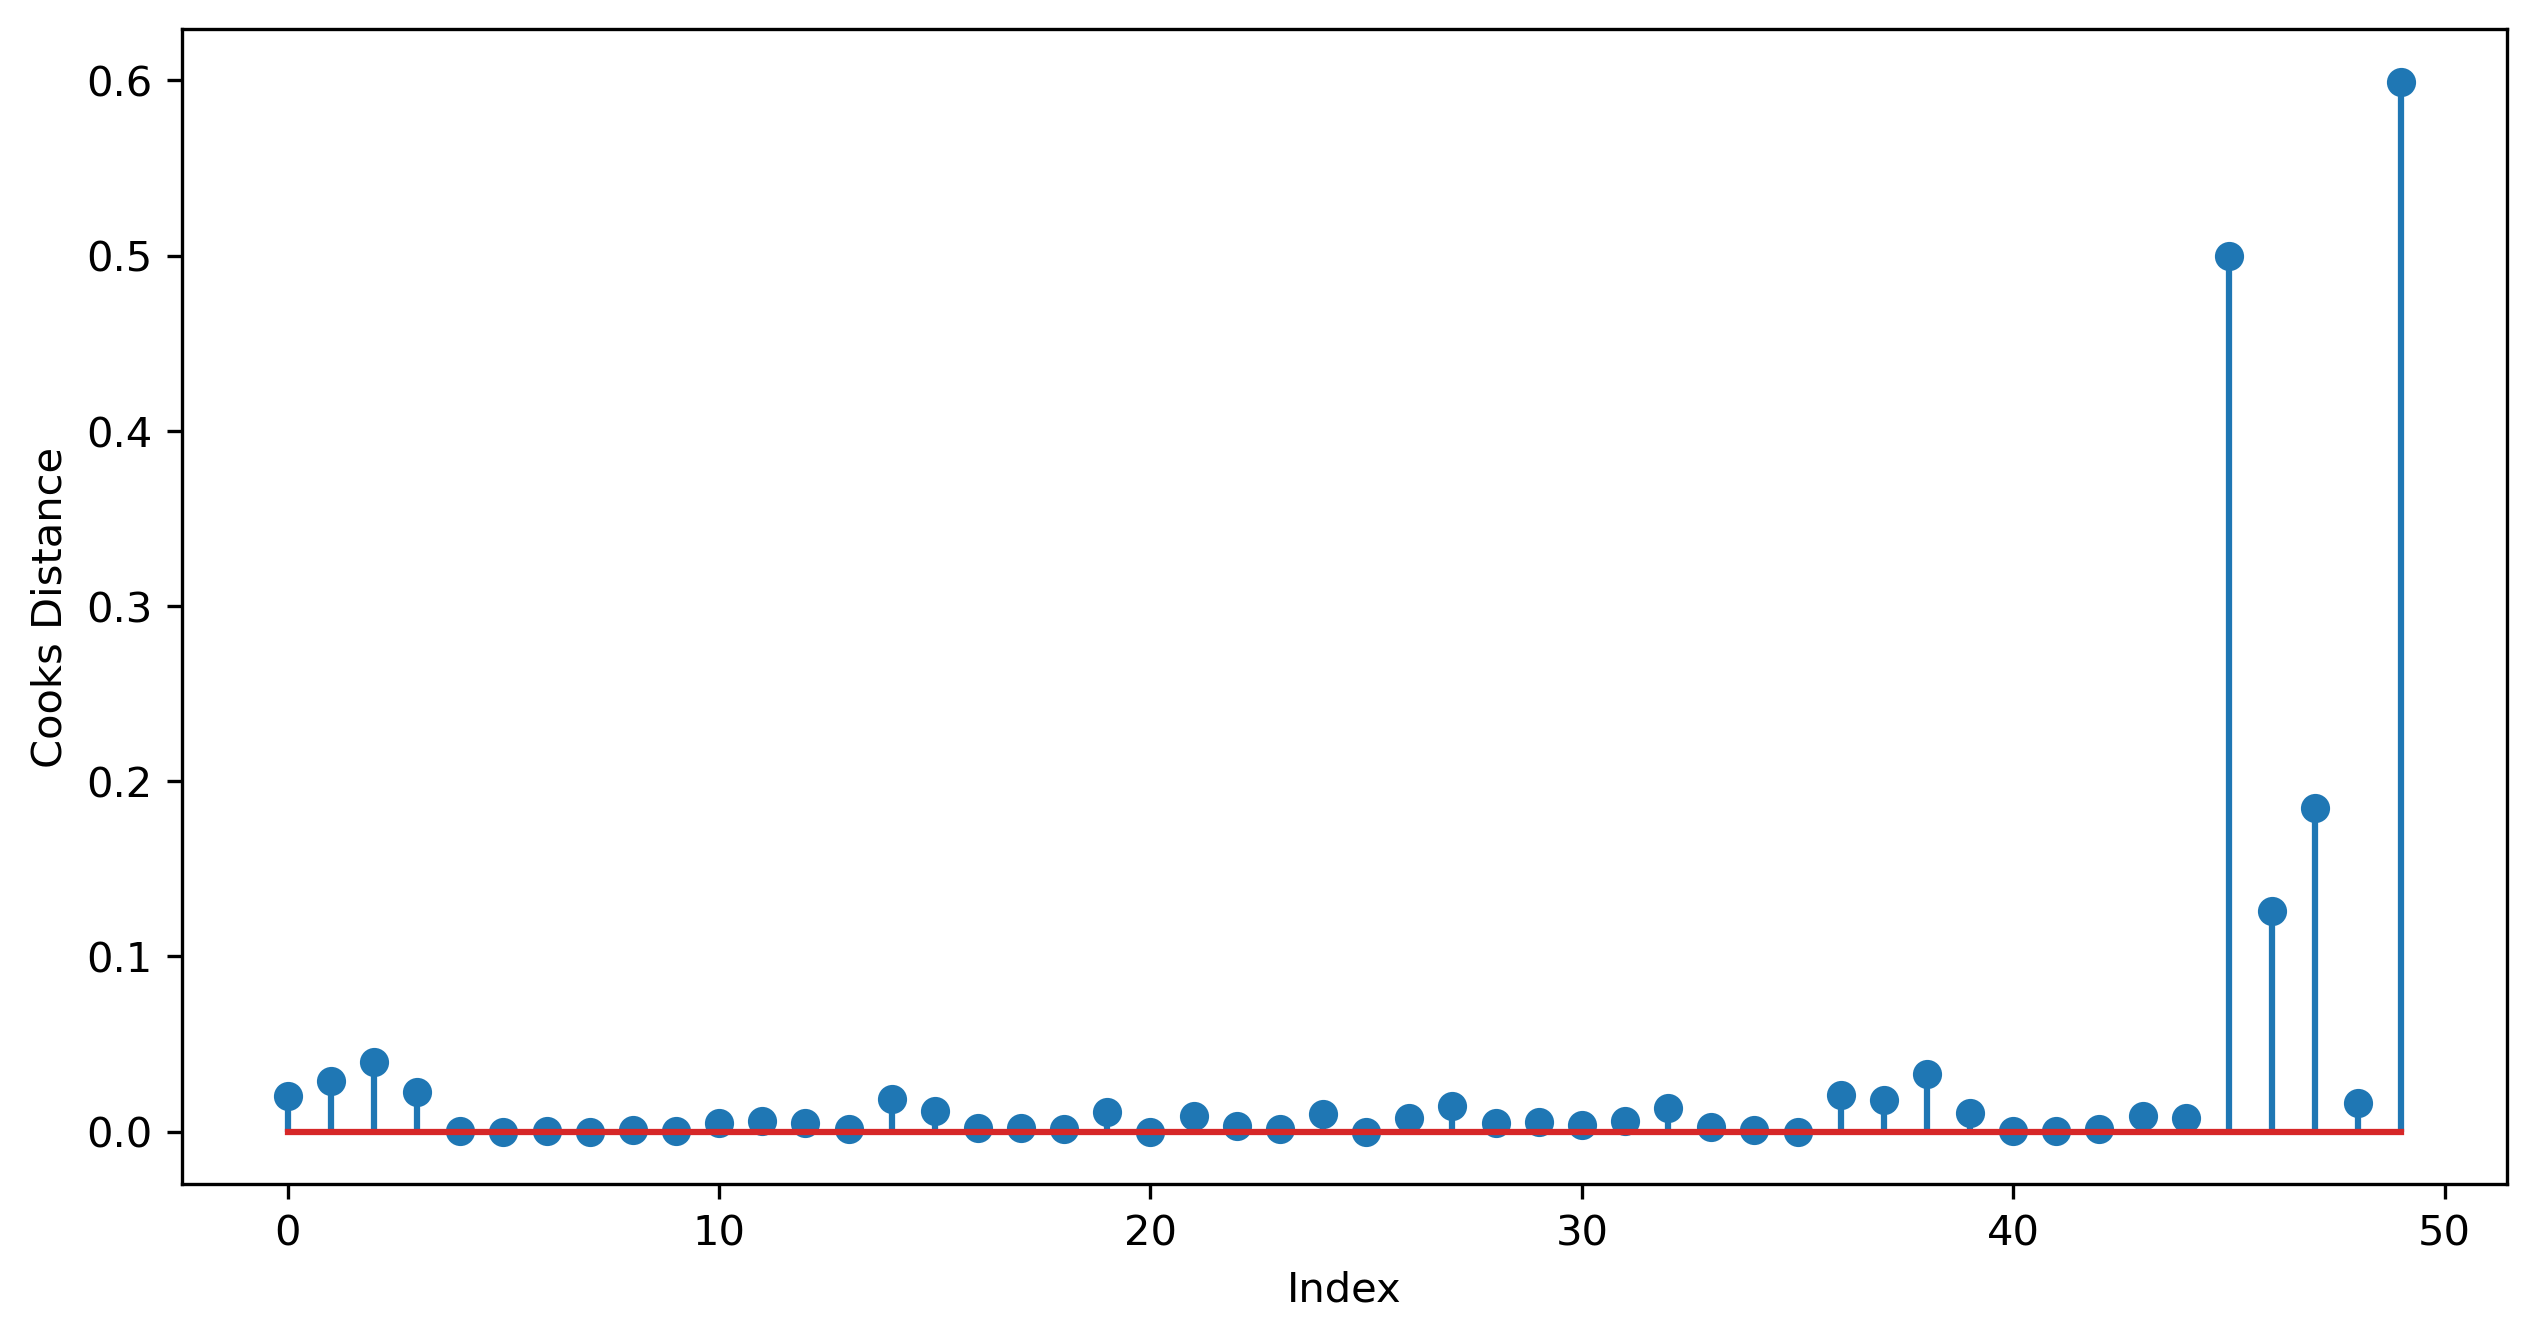

In [34]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [35]:
# all are normal data points.